In [1]:
import os
import sys
from dotenv import load_dotenv

notebook_path = os.getcwd()

# One level up from the notebook
PROJECT_ROOT = os.path.abspath(os.path.join(notebook_path, "../"))

DATA_ROOT = os.path.join(PROJECT_ROOT, "data")

sys.path.insert(1, PROJECT_ROOT)
load_dotenv()

True

In [2]:
import glob

import databento as db
import pandas as pd
import numpy as np
import datetime

import plotly.graph_objects as go

In [3]:
def read_df_with_prefix(directory, prefix):
    tmp = []

    for filename in glob.glob(os.path.join(directory, f"{prefix}*")):
        tmp.append(pd.read_csv(filename, index_col=0))

    return pd.concat(tmp, axis=0)

In [24]:
symbols = ["SPY", "AAPL", "MSFT", "AMZN", "GOOG", "NVDA", "TSLA"] # dropped META because of FB-META change.
symbols_w_meta = symbols[:] + ['META']
tmp = []

for symbol in symbols:
    directory = os.path.join(DATA_ROOT, "databento")
    prefix = f"{symbol}_ohlcv-1m_"

    tmpdf = read_df_with_prefix(directory, prefix)
    tmpdf.index = pd.to_datetime(tmpdf.index)
    tmpdf = tmpdf[['open','high','low','close','volume']]
    tmpdf.columns = [f"{symbol}_{x}" for x in tmpdf.columns]
    tmp.append(tmpdf)

df = pd.concat(tmp, axis=1)

In [25]:
# deal with META separately...
tmp = []
for fname in glob.glob(os.path.join(directory, "FB_ohlcv-1m_*")):
    tmpdf = pd.read_csv(fname, index_col=0)
    tmpdf.index = pd.to_datetime(tmpdf.index)
    tmpdf = tmpdf[['open','high','low','close','volume']]
    tmp.append(tmpdf)

fb_df = pd.concat(tmp, axis=0)
fb_df = fb_df.loc[:'2022-06-09']

tmp = []
for fname in glob.glob(os.path.join(directory, "META_ohlcv-1m_*")):
    tmpdf = pd.read_csv(fname, index_col=0)
    tmpdf.index = pd.to_datetime(tmpdf.index)
    tmpdf = tmpdf[['open','high','low','close','volume']]
    tmp.append(tmpdf)

meta_df = pd.concat(tmp, axis=0)
meta_df = meta_df.loc['2022-06-09':]

meta_df = pd.concat([fb_df, meta_df], axis=0)
meta_df.columns = [f"META_{x}" for x in meta_df.columns]

In [28]:
# merge back
df = pd.concat([df, meta_df], axis=1)

In [29]:
df

,SPY_open,SPY_high,SPY_low,SPY_close,SPY_volume,AAPL_open,AAPL_high,AAPL_low,AAPL_close,AAPL_volume,...,TSLA_open,TSLA_high,TSLA_low,TSLA_close,TSLA_volume,META_open,META_high,META_low,META_close,META_volume
ts_event,,,,,,,,,,,,,,,,,,,,,
2018-05-01 08:45:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,171.50,171.50,171.50,171.50,2.0
2018-05-01 09:18:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,171.93,171.93,171.93,171.93,6.0
2018-05-01 09:46:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,171.93,171.93,171.93,171.93,10.0
2018-05-01 10:47:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,171.93,171.93,171.93,171.93,13.0
2018-05-01 10:59:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,172.15,172.15,172.15,172.15,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31 23:45:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,585.79,585.79,585.79,585.79,2.0
2024-12-31 23:47:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,585.75,585.75,585.75,585.75,51.0
2024-12-31 23:49:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,585.72,585.72,585.71,585.71,5.0


In [30]:
df = df.between_time('14:00','22:00')

base = {
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close': 'last',
    'volume': 'sum',
}

aggdict = {}
for symbol in symbols_w_meta:
    for col in ['open', 'high', 'low', 'close', 'volume']:
        aggdict[f'{symbol}_{col}'] = base[col]

timeframe = "1D"
resampled_df = df.resample(timeframe).agg(aggdict)
resampled_df = resampled_df.ffill()
resampled_df = resampled_df[[f'{s}_close' for s in symbols_w_meta]].rename(columns={f'{s}_close': s for s in symbols_w_meta})

<Axes: xlabel='ts_event'>

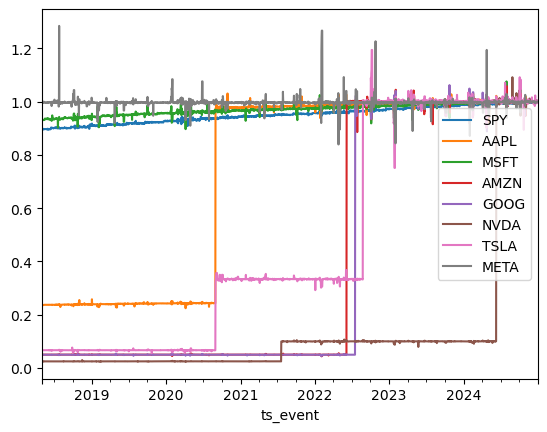

In [31]:
tmp = []
for symbol in (symbols_w_meta):
    tmpdf = pd.read_csv(os.path.join(DATA_ROOT, f"{symbol}.O.csv"), index_col=0)
    tmpdf.columns = [f"{symbol}_{x}" for x in tmpdf.columns]
    tmpdf.index = pd.to_datetime(tmpdf.index, utc=True)
    tmp.append(tmpdf)

yf_df = pd.concat(tmp, axis=1)
yf_df = yf_df.loc['2018-05-01':'2024-12-31',["SPY_ADJ_CLOSE","AAPL_CLOSE","MSFT_CLOSE",'AMZN_CLOSE','GOOG_CLOSE','NVDA_CLOSE','TSLA_CLOSE','META_CLOSE']]
yf_df = yf_df.rename(columns={"SPY_ADJ_CLOSE": "SPY_CLOSE"})
yf_df = yf_df.ffill()

factor_df = pd.DataFrame(index=resampled_df.index)

for symbol in (symbols_w_meta):
    factor_df[symbol] = yf_df.loc['2018-05-01':'2024-12-31',f"{symbol}_CLOSE"] / resampled_df[f'{symbol}']

factor_df = factor_df.ffill()
factor_df.plot()

In [32]:
resampled_df = resampled_df * factor_df # adjusted price
resampled_df

,SPY,AAPL,MSFT,AMZN,GOOG,NVDA,TSLA,META
ts_event,,,,,,,,
2018-05-01 00:00:00+00:00,237.557266,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-02 00:00:00+00:00,235.961380,41.707637,87.044921,78.48400,51.035621,5.600075,20.076669,175.399982
2018-05-03 00:00:00+00:00,235.441498,41.783225,87.566204,78.60375,51.002739,5.765372,18.963336,173.357783
2018-05-04 00:00:00+00:00,238.489563,43.422524,88.580844,79.04750,52.222855,5.915575,19.606002,175.937927
2018-05-05 00:00:00+00:00,238.489563,43.422524,88.580844,79.04750,52.222855,5.915575,19.606002,175.937927
...,...,...,...,...,...,...,...,...
2024-12-27 00:00:00+00:00,595.010010,255.590000,430.530000,223.75000,194.040000,137.010000,431.660000,599.810000
2024-12-28 00:00:00+00:00,595.010010,255.590000,430.530000,223.75000,194.040000,137.010000,431.660000,599.810000
2024-12-29 00:00:00+00:00,595.010010,255.590000,430.530000,223.75000,194.040000,137.010000,431.660000,599.810000


In [33]:
returns_df = resampled_df.pct_change()
returns_df.tail()

,SPY,AAPL,MSFT,AMZN,GOOG,NVDA,TSLA,META
ts_event,,,,,,,,
2024-12-27 00:00:00+00:00,-0.010527,-0.013242,-0.017302,-0.014534,-0.015525,-0.020868,-0.049479,-0.005867
2024-12-28 00:00:00+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2024-12-29 00:00:00+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2024-12-30 00:00:00+00:00,-0.011412,-0.013263,-0.013239,-0.010950,-0.006957,0.003503,-0.033012,-0.014288
2024-12-31 00:00:00+00:00,-0.003638,-0.007058,-0.007838,-0.008631,-0.011677,-0.023274,-0.032510,-0.009691


In [34]:
ivv_reference = pd.read_csv(os.path.join(DATA_ROOT, 'ivv-24eoy-weights.csv'), index_col=0)
ivv_reference['Market Value'] = pd.to_numeric(ivv_reference['Market Value'].apply(lambda x: x.replace(',','')))
ivv_reference['weight'] = ivv_reference['Market Value'] / ivv_reference['Market Value'].sum()
ivv_reference.loc[symbols[1:], ['Weight (%)', 'weight']]

,Weight (%),weight
Ticker,,
AAPL,7.58,0.075829
MSFT,6.28,0.062778
AMZN,4.11,0.041129
GOOG,1.82,0.018156
NVDA,6.60,0.065990
TSLA,2.26,0.022593


In [35]:
mktcap_df = pd.DataFrame(index=resampled_df.index, columns=symbols_w_meta+['OTHERS'])

market_size = ivv_reference['Market Value'].sum()
market_base_size = market_size / (returns_df['SPY'] + 1).cumprod().ffill().fillna(1).loc['2024-12-31']
market_size_ser = (returns_df['SPY'] + 1).cumprod().ffill().fillna(1) * market_base_size
mktcap_df.loc[:,'SPY'] = market_size_ser

base = ivv_reference.loc[symbols_w_meta[1:], 'Market Value'] / (returns_df[symbols_w_meta[1:]] + 1).cumprod().ffill().fillna(1).loc['2024-12-31']
size_ser = (returns_df[symbols_w_meta[1:]] + 1).cumprod().ffill().fillna(1) * base
mktcap_df.loc[:, symbols_w_meta[1:]] = size_ser

mktcap_df.loc[:, 'OTHERS'] = mktcap_df['SPY'] - mktcap_df[symbols_w_meta[1:]].sum(1)

mktcap_df

,SPY,AAPL,MSFT,AMZN,GOOG,NVDA,TSLA,META,OTHERS
ts_event,,,,,,,,,
2018-05-01 00:00:00+00:00,237584844928.760773,7402673247.332637,7599038338.472104,8624263235.531971,2852015284.707688,1612993170.40244,658363713.618609,4489807708.492608,204345690230.202728
2018-05-02 00:00:00+00:00,235988773427.356018,7402673247.332637,7599038338.472104,8624263235.531971,2852015284.707688,1612993170.40244,658363713.618609,4489807708.492608,202749618728.797974
2018-05-03 00:00:00+00:00,235468830870.615692,7416089203.832305,7644546428.190255,8637422038.886221,2850177753.627515,1660603944.907713,621854751.249588,4437532444.095438,202200604305.82666
2018-05-04 00:00:00+00:00,238517249914.651306,7707047760.418863,7733124674.248799,8686183784.092472,2918361293.253915,1703867028.926726,642929385.814699,4503577778.138692,204622158209.757141
2018-05-05 00:00:00+00:00,238517249914.651306,7707047760.418863,7733124674.248799,8686183784.092472,2918361293.253915,1703867028.926726,642929385.814699,4503577778.138692,204622158209.757141
...,...,...,...,...,...,...,...,...,...
2024-12-27 00:00:00+00:00,595079086156.740967,45364575298.470009,37585351661.760002,24586908146.249996,10843505691.480001,39463079219.489998,14155200621.820004,15353659267.779995,407726806249.690918
2024-12-28 00:00:00+00:00,595079086156.740967,45364575298.470009,37585351661.760002,24586908146.249996,10843505691.480001,39463079219.489998,14155200621.820004,15353659267.779995,407726806249.690918
2024-12-29 00:00:00+00:00,595079086156.740967,45364575298.470009,37585351661.760002,24586908146.249996,10843505691.480001,39463079219.489998,14155200621.820004,15353659267.779995,407726806249.690918


In [36]:
weights_df = (mktcap_df[symbols_w_meta[1:] + ['OTHERS']].div(mktcap_df['SPY'], axis=0))
weights_df

,AAPL,MSFT,AMZN,GOOG,NVDA,TSLA,META,OTHERS
ts_event,,,,,,,,
2018-05-01 00:00:00+00:00,0.031158,0.031985,0.0363,0.012004,0.006789,0.002771,0.018898,0.860096
2018-05-02 00:00:00+00:00,0.031369,0.032201,0.036545,0.012085,0.006835,0.00279,0.019026,0.859149
2018-05-03 00:00:00+00:00,0.031495,0.032465,0.036682,0.012104,0.007052,0.002641,0.018846,0.858715
2018-05-04 00:00:00+00:00,0.032312,0.032422,0.036417,0.012235,0.007144,0.002696,0.018882,0.857892
2018-05-05 00:00:00+00:00,0.032312,0.032422,0.036417,0.012235,0.007144,0.002696,0.018882,0.857892
...,...,...,...,...,...,...,...,...
2024-12-27 00:00:00+00:00,0.076233,0.06316,0.041317,0.018222,0.066316,0.023787,0.025801,0.685164
2024-12-28 00:00:00+00:00,0.076233,0.06316,0.041317,0.018222,0.066316,0.023787,0.025801,0.685164
2024-12-29 00:00:00+00:00,0.076233,0.06316,0.041317,0.018222,0.066316,0.023787,0.025801,0.685164


Plot the weights of Magnificent 7 in SP500

In [37]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [38]:
fig = make_subplots(rows=1, cols=2)

sums = weights_df[symbols_w_meta[1:]].sum(axis=1)
individual_weights = weights_df[symbols_w_meta[1:]]

fig = make_subplots(rows=1, cols=2, subplot_titles=("Sum of Weights", "Individual Weights"))

# Plot 1: Sum of weights (Series)
fig.add_trace(go.Scatter(x=sums.index, y=sums, mode='lines', name='Sum of Weights'), row=1, col=1)

# Plot 2: Individual weights (DataFrame - multiple lines)
for column in individual_weights.columns:
    fig.add_trace(go.Scatter(x=individual_weights.index, y=individual_weights[column], mode='lines', name=column), row=1, col=2)

fig.update_layout(title="Side-by-Side Plots", showlegend=True)
fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="Weight")

fig.show()

c:\ProgramData\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

c:\ProgramData\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [39]:
weights_df.to_csv(os.path.join(DATA_ROOT, 'mag7-wgt-approx.csv'))